<a href="https://colab.research.google.com/github/DuhanMahardikaA/Customer-Segmentation-Classification/blob/main/Project/Customer_Segmentation_Classifiction_Unsupervised_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <h1 style="font-family: Trebuchet MS; padding: 5px; font-size: 48px; color: gold; text-align: center; line-height: 1;"><b>Customer Segmentation<span style="color: #000000"> Classification



#**Table of Content**

1. [Context](#1)
2. [Import Libraries](#2)
3. [Data Understanding](#3)
4. [Data Preparation](#4)
    1. [Missing Values](#5)
    2. [Encoding](#6)
    3. [Normalization](#7)
5. [Modeling](#10)
    1. [Elbow Method](#11)
    2. [KMeans](#12)
6. [Conclusion](#13)




<a id="1"></a>

---

# **Context**
An automobile company has plans to enter new markets with their existing products (P1, P2, P3, P4, and P5). After intensive market research, they’ve deduced that the behavior of the new market is similar to their existing market.

In their existing market, the sales team has classified all customers into 4 segments (A, B, C, D ). Then, they performed segmented outreach and communication for a different segment of customers. This strategy has work e exceptionally well for them. They plan to use the same strategy for the new markets and have identified 2627 new potential customers.

You are required to help the manager to predict the right group of the new customers..



---

## **Content**

* ID - 	Unique ID
* Gender - Gender of the customer
* Ever_Married -	Marital status of the customer
* Age -	Age of the customer
* Graduated	- Is the customer a graduate?
* Profession -	Profession of the customer
* Work_Experience - Work Experience in years
* Spending_Score- Spending score of the customer
* Family_Size -	Number of family members for the customer (including the customer)
* Var_1 -	Anonymised Category for the customer
* Segmentation - (target) Customer Segment of the customer


---
## **Target**
The target is to plan to enter new market with existing products while accurately predicting the new customer segments.


# **Import Necessary Libraries**

In [ ]:
pip install pandas numpy matplotlib seaborn scikit-learn

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, OrdinalEncoder
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA



# **Data Understanding**

In [3]:
# Import dataset
path_Train = pd.read_csv("/content/Train.csv")
path_Test = pd.read_csv("/content/Test.csv")

# Concatenate the dataframes vertically
df = pd.concat([path_Train, path_Test], axis=0)

In [4]:
df.shape

(10695, 11)

In [5]:
df.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A


In [6]:
#dropping the labels for Unsupervised Learning
df.drop('Segmentation', axis=1, inplace=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10695 entries, 0 to 2626
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               10695 non-null  int64  
 1   Gender           10695 non-null  object 
 2   Ever_Married     10505 non-null  object 
 3   Age              10695 non-null  int64  
 4   Graduated        10593 non-null  object 
 5   Profession       10533 non-null  object 
 6   Work_Experience  9597 non-null   float64
 7   Spending_Score   10695 non-null  object 
 8   Family_Size      10247 non-null  float64
 9   Var_1            10587 non-null  object 
dtypes: float64(2), int64(2), object(6)
memory usage: 919.1+ KB


In [8]:
df.describe()

,ID,Age,Work_Experience,Family_Size
count,10695.000000,10695.000000,9597.000000,10247.000000
mean,463468.088640,43.511828,2.619777,2.844052
std,2600.966411,16.774158,3.390790,1.536427
min,458982.000000,18.000000,0.000000,1.000000
25%,461220.500000,30.000000,0.000000,2.000000
50%,463451.000000,41.000000,1.000000,3.000000
75%,465733.500000,53.000000,4.000000,4.000000
max,467974.000000,89.000000,14.000000,9.000000


# **Data Preparation**
Data preparation in the context of customer segmentation classification is a series of steps to process and organize data to suit the needs of analysis or creation of customer classification models. The goal is to ensure the data used for customer segmentation and classification is high quality, relevant, and reliable

**Missing Values**

In [9]:
df.isnull().sum()

ID                    0
Gender                0
Ever_Married        190
Age                   0
Graduated           102
Profession          162
Work_Experience    1098
Spending_Score        0
Family_Size         448
Var_1               108
dtype: int64

In [10]:
df.Var_1.value_counts()

Cat_6    6910
Cat_4    1475
Cat_3    1089
Cat_2     563
Cat_7     269
Cat_1     167
Cat_5     114
Name: Var_1, dtype: int64

In [11]:
df.Profession.value_counts()

Artist           3318
Healthcare       1750
Entertainment    1250
Engineer          935
Doctor            930
Lawyer            844
Executive         775
Marketing         403
Homemaker         328
Name: Profession, dtype: int64

In [12]:
df.drop(df.index[df.Profession.isnull()], inplace=True)
df.drop(df.index[df.Var_1.isnull()], inplace=True)

df.shape

(10295, 10)

* The samples that has null values in 'Profession' and Var_1 was dropped, as they'ye more specific columns almost **200** samples was deleted

For the 'Graduation', 'Work_Experience', 'and 'Ever_Married' column, we'll impute values according with the customer's age

In [13]:
# 'Ever_Married' column

for row in df.iterrows():
    if pd.isna(row[1]['Ever_Married']):

      age = row[1]['Age']
      id_ = row[1]['ID']

      value = df.loc[df.Age == age, 'Ever_Married'].value_counts().index[0]
      df.loc[df.ID == id_, 'Ever_Married'] = value

In [14]:
# 'Graduated' column

for row in df.iterrows():
    if pd.isna(row[1]['Graduated']):

      age = row[1]['Age']
      id_ = row[1]['ID']

      value = df.loc[df.Age == age, 'Graduated'].value_counts().index[0]
      df.loc[df.ID == id_, 'Graduated'] = value

In [15]:
# 'Work_Experience' column

for row in df.iterrows():
    if pd.isna(row[1]['Work_Experience']):

      age = row[1]['Age']
      id_ = row[1]['ID']

      value = df.loc[df.Age == age, 'Work_Experience'].value_counts().index[0]
      df.loc[df.ID == id_, 'Work_Experience'] = value

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10295 entries, 0 to 2626
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               10295 non-null  int64  
 1   Gender           10295 non-null  object 
 2   Ever_Married     10295 non-null  object 
 3   Age              10295 non-null  int64  
 4   Graduated        10295 non-null  object 
 5   Profession       10295 non-null  object 
 6   Work_Experience  10295 non-null  float64
 7   Spending_Score   10295 non-null  object 
 8   Family_Size      9883 non-null   float64
 9   Var_1            10295 non-null  object 
dtypes: float64(2), int64(2), object(6)
memory usage: 884.7+ KB


Most of the columns have a non-null count equal to the total number of rows (10295), except the 'Family_Size' column which has some missing values.



imputing the median to the null values in the 'Family_Size' column.

In [17]:
imputer = SimpleImputer(strategy='median')
imputer.fit(df.Family_Size.values.reshape(-1, 1))

SimpleImputer(strategy='median')

In [18]:
df['Family_Size'] = imputer.transform(df.Family_Size.values.reshape(-1, 1))

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10295 entries, 0 to 2626
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               10295 non-null  int64  
 1   Gender           10295 non-null  object 
 2   Ever_Married     10295 non-null  object 
 3   Age              10295 non-null  int64  
 4   Graduated        10295 non-null  object 
 5   Profession       10295 non-null  object 
 6   Work_Experience  10295 non-null  float64
 7   Spending_Score   10295 non-null  object 
 8   Family_Size      10295 non-null  float64
 9   Var_1            10295 non-null  object 
dtypes: float64(2), int64(2), object(6)
memory usage: 884.7+ KB


In [20]:
data= df.copy()

**Encoding**

Encoding is the process of changing data from one form or representation to another

In [21]:
onehot = OneHotEncoder(drop='if_binary', sparse_output=False)

assigning onehot encoding to the binary categorical variables

In [22]:
df.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4
1,462643,Female,Yes,38,Yes,Engineer,0.0,Average,3.0,Cat_4
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6
4,462669,Female,Yes,40,Yes,Entertainment,1.0,High,6.0,Cat_6
5,461319,Male,Yes,56,No,Artist,0.0,Average,2.0,Cat_6


In [23]:
df['Gender'] = onehot.fit_transform(df.Gender.values.reshape(-1, 1))
df['Ever_Married'] = onehot.fit_transform(df.Ever_Married.values.reshape(-1, 1))
df['Graduated'] = onehot.fit_transform(df.Graduated.values.reshape(-1, 1))

assigning numeric ordinal values to the 'Spending_Score' and 'Segmentation' columns

In [24]:
df.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
0,462809,1.0,0.0,22,0.0,Healthcare,1.0,Low,4.0,Cat_4
1,462643,0.0,1.0,38,1.0,Engineer,0.0,Average,3.0,Cat_4
3,461735,1.0,1.0,67,1.0,Lawyer,0.0,High,2.0,Cat_6
4,462669,0.0,1.0,40,1.0,Entertainment,1.0,High,6.0,Cat_6
5,461319,1.0,1.0,56,0.0,Artist,0.0,Average,2.0,Cat_6


In [25]:
ord_Spending = OrdinalEncoder(categories=[['Low', 'Average', 'High']])

In [26]:
df['Spending_Score'] = ord_Spending.fit_transform(df.Spending_Score.values.reshape(-1, 1))

spliting 'Profession' and 'Var_1' columns into single columns for each value

In [27]:
df = pd.get_dummies(df, dtype='float64')

In [28]:
df.head()

,ID,Gender,Ever_Married,Age,Graduated,Work_Experience,Spending_Score,Family_Size,Profession_Artist,Profession_Doctor,...,Profession_Homemaker,Profession_Lawyer,Profession_Marketing,Var_1_Cat_1,Var_1_Cat_2,Var_1_Cat_3,Var_1_Cat_4,Var_1_Cat_5,Var_1_Cat_6,Var_1_Cat_7
0,462809,1.0,0.0,22,0.0,1.0,0.0,4.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,462643,0.0,1.0,38,1.0,0.0,1.0,3.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,461735,1.0,1.0,67,1.0,0.0,2.0,2.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,462669,0.0,1.0,40,1.0,1.0,2.0,6.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5,461319,1.0,1.0,56,0.0,0.0,1.0,2.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


**Normalization**

Normalization is the process of changing the value of a variable into a certain range or standard distribution

In [29]:
df.drop('ID', axis=1, inplace=True)

In [30]:
minmax = MinMaxScaler()

In [31]:
df[df.columns] = minmax.fit_transform(df)

In [32]:
df.head()

,Gender,Ever_Married,Age,Graduated,Work_Experience,Spending_Score,Family_Size,Profession_Artist,Profession_Doctor,Profession_Engineer,...,Profession_Homemaker,Profession_Lawyer,Profession_Marketing,Var_1_Cat_1,Var_1_Cat_2,Var_1_Cat_3,Var_1_Cat_4,Var_1_Cat_5,Var_1_Cat_6,Var_1_Cat_7
0,1.0,0.0,0.056338,0.0,0.071429,0.0,0.375,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,1.0,0.281690,1.0,0.000000,0.5,0.250,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,1.0,1.0,0.690141,1.0,0.000000,1.0,0.125,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,1.0,0.309859,1.0,0.071429,1.0,0.625,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5,1.0,1.0,0.535211,0.0,0.000000,0.5,0.125,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


# **Modeling**


In [33]:
pca = PCA(2)
pca_data = pca.fit_transform(df)

In [34]:
pca_df = pd.DataFrame(pca_data, columns=['PCA1', 'PCA2'])

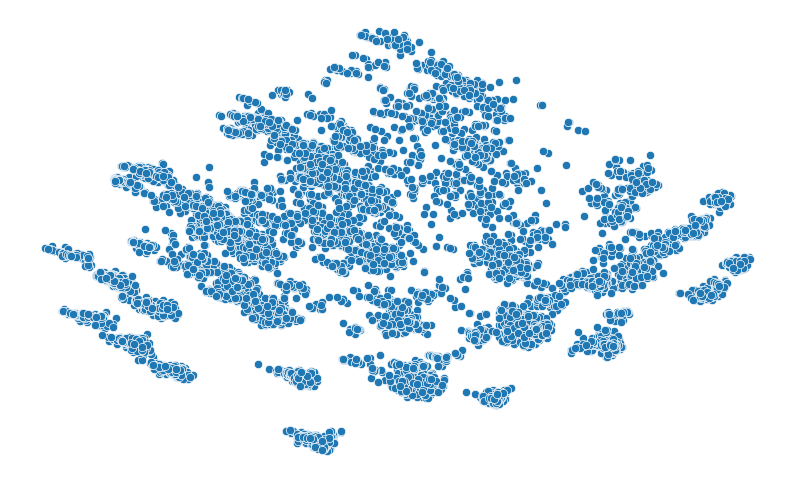

In [35]:
fig, ax = plt.subplots(figsize=(10, 6))

sns.scatterplot(data=pca_df, x='PCA1', y='PCA2', ax=ax)

ax.yaxis.set_visible(False)
ax.xaxis.set_visible(False)
ax.spines[:].set_visible(False)

plt.show()

**Elbow Method**

In [36]:
inertias = []
for k in range(1, 15):
    kmeans = KMeans(n_clusters=k, n_init='auto')
    kmeans.fit(pca_data)
    inertias.append(kmeans.inertia_)

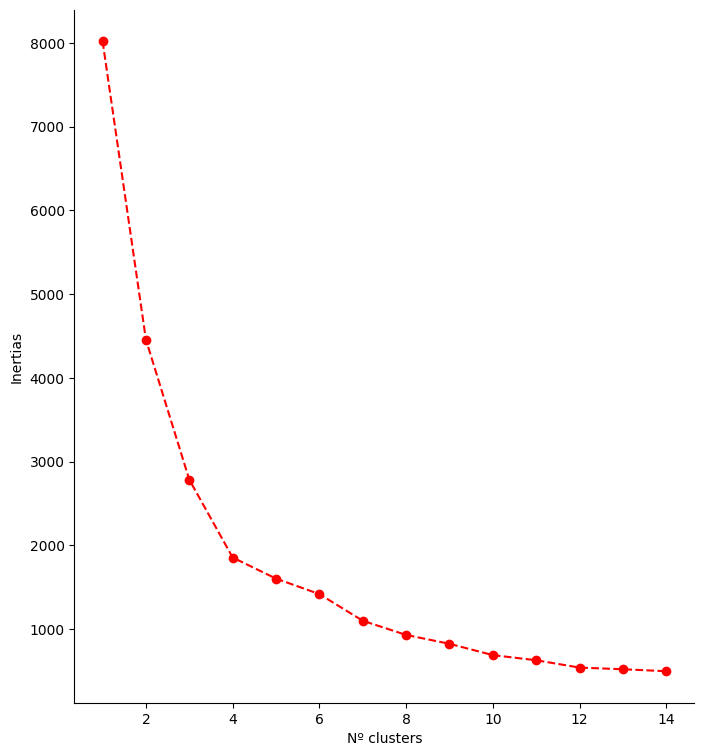

In [37]:
fig, ax = plt.subplots(figsize=(8, 9))

ax.plot(range(1, 15), inertias, 'r--', marker='o', label='Inertias')

ax.spines[['top', 'right']].set_visible(False)
ax.set_xlabel('Nº clusters', fontsize=10)
ax.set_ylabel('Inertias', fontsize=10)

plt.show()

Based on the graph above, it can be seen that at point 4 there is a quite sharp curve, so it can be concluded that K=4 is the optimal value






In [38]:
n_clusters = 4

**KMeans**

In [39]:
kmeans = KMeans(n_clusters=n_clusters, n_init='auto', random_state=42)
kmeans.fit(pca_data)

KMeans(n_clusters=4, n_init='auto', random_state=42)

In [40]:
labels = kmeans.labels_

In [41]:
mapping = {0: 'A', 1: 'B', 2: 'C', 3: 'D'}

labels_mapping = [mapping[val] for val in labels]

In [42]:
data['Clusters'] = labels_mapping

In [43]:
pca_df['Clusters'] = labels_mapping

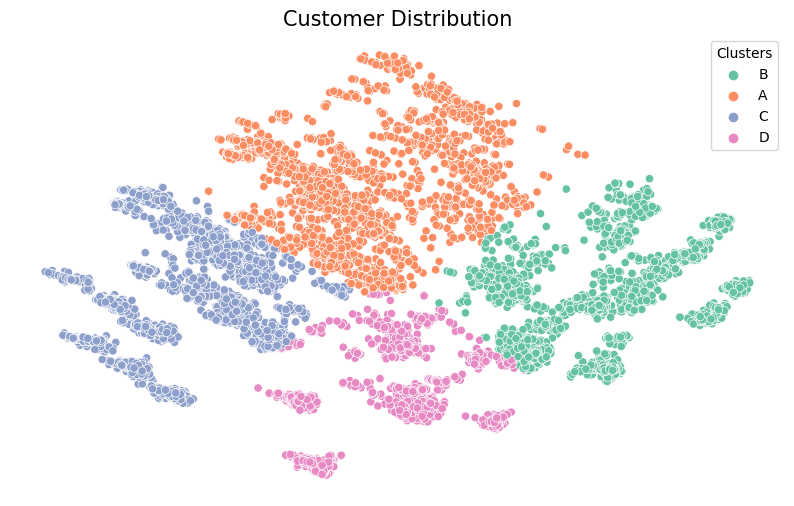

In [44]:
fig, ax = plt.subplots(figsize=(10, 6))

sns.scatterplot(data=pca_df, x='PCA1', y='PCA2', hue='Clusters', ax=ax, palette='Set2')

ax.set_title('Customer Distribution', fontsize=15)

ax.yaxis.set_visible(False)
ax.xaxis.set_visible(False)
ax.spines[:].set_visible(False)

plt.savefig('customer_distribution.png')

Now let's look at the criteria for each class our model separated data from.

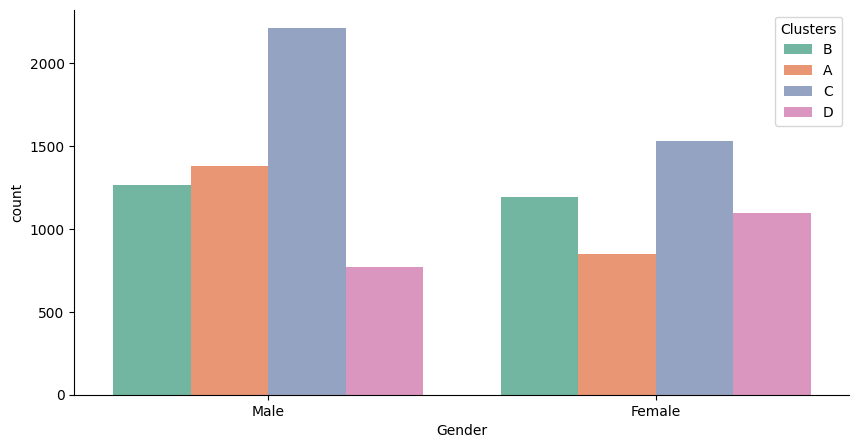

In [45]:
fig, ax = plt.subplots(figsize=(10, 5))

sns.countplot(data, x='Gender', hue='Clusters', palette='Set2')

ax.spines[['top', 'right']].set_visible(False)

plt.show()

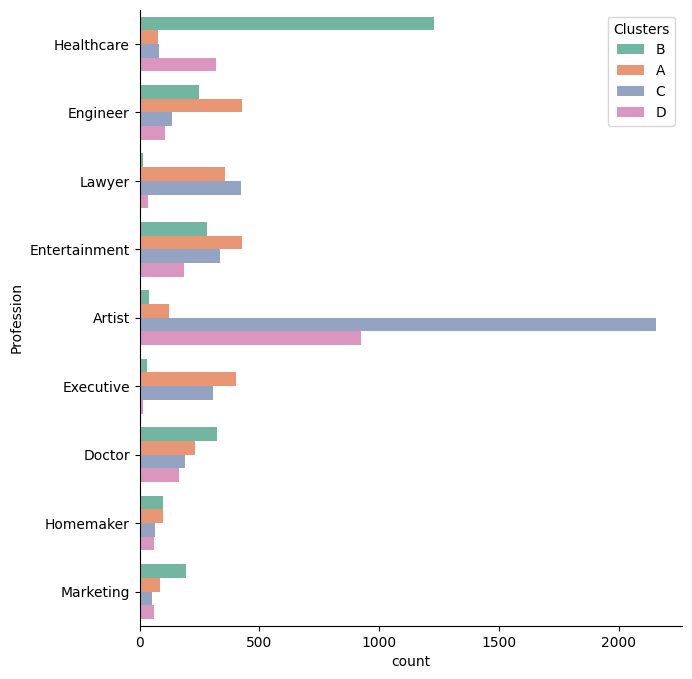

In [46]:
fig, ax = plt.subplots(figsize=(7, 8))

sns.countplot(data, y='Profession', hue='Clusters', palette='Set2')

ax.spines[['top', 'right']].set_visible(False)

plt.show()

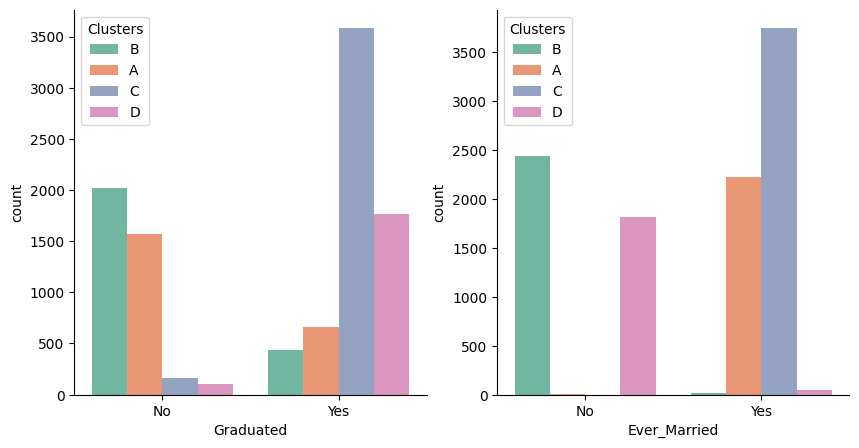

In [47]:
fig, ax = plt.subplots(ncols=2, figsize=(10, 5))

sns.countplot(data, x='Graduated', hue='Clusters', palette='Set2', ax=ax[0])
sns.countplot(data, x='Ever_Married', hue='Clusters', palette='Set2', ax=ax[1])

ax[0].spines[['top', 'right']].set_visible(False)
ax[1].spines[['top', 'right']].set_visible(False)

plt.show()

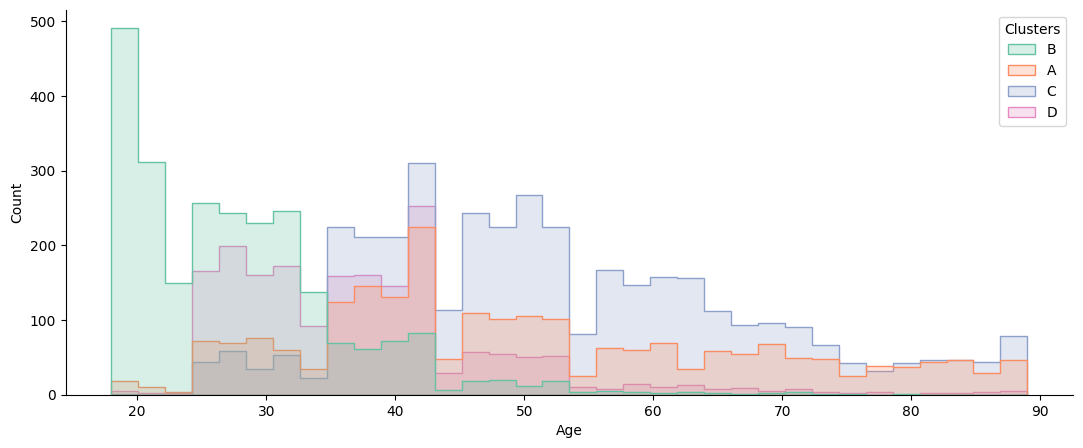

In [48]:
fig, ax = plt.subplots(figsize=(13, 5))

sns.histplot(data, x='Age', hue='Clusters', element='step', palette='Set2')

ax.spines[['top', 'right']].set_visible(False)

plt.show()

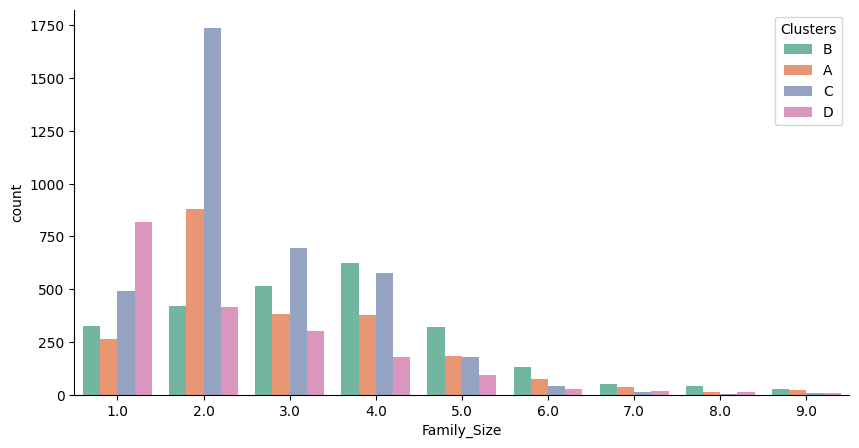

In [49]:
fig, ax = plt.subplots(figsize=(10, 5))

sns.countplot(data, x='Family_Size', hue='Clusters', palette='Set2')

ax.spines[['top', 'right']].set_visible(False)

plt.show()

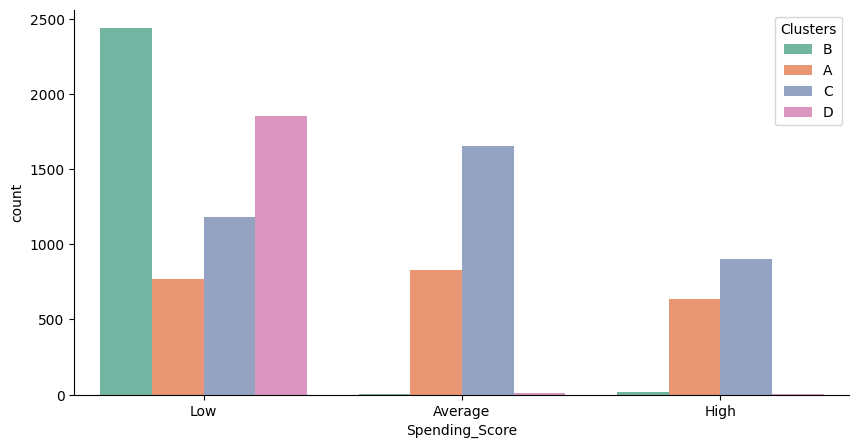

In [50]:
fig, ax = plt.subplots(figsize=(10, 5))

sns.countplot(data, x='Spending_Score', hue='Clusters', palette='Set2')

ax.spines[['top', 'right']].set_visible(False)

plt.show()

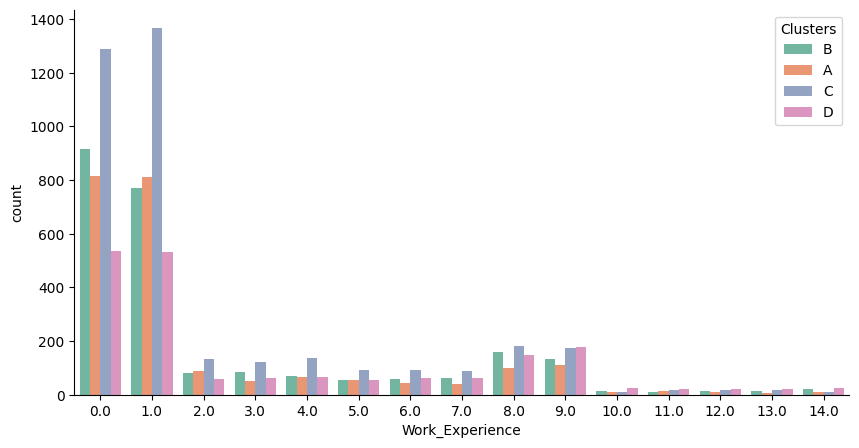

In [51]:
fig, ax = plt.subplots(figsize=(10, 5))

sns.countplot(data, x='Work_Experience', hue='Clusters', palette='Set2')

ax.spines[['top', 'right']].set_visible(False)

plt.show()

# **Conclusion**

* Cluster A
  1. Primarily comprised of artists.
  2. Essentially, all clients in this group have been married at least once and are graduates.

* Cluster B
  1. Dominated by healthcare jobs with 0 - 1 year of experience.
  2. Scores for both female and male genders are nearly identical.
  3. All clients in this group are unmarried and have not graduated.
  4. Typically in their 20s within this group.

* Cluster C
  1. Mainly consisting of individuals with low expenditures.
  2. Comprising individuals who have never been married.
  3. Featuring a high proportion of artists and graduates.

* Cluster D
  1. Mainly composed of individuals who have been married at least once.
  2. Generally comprised of older individuals.
  3. Significant balance in other variables, including expenditure level, family size, years of experience, diverse professions, etc.

